# Exploratory Data Analysis


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

### Prepare the environment

Install tensorflow object detection api dependencies

In [13]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
import sys
sys.path.append('/content/gdrive/MyDrive/GoogleColab/lib')
sys.path.append('/content/gdrive/MyDrive/GoogleColab/lib/models/research/')
sys.path.append('/content/gdrive/MyDrive/GoogleColab/lib/models/research/slim/')
sys.path.append('/content/gdrive/MyDrive/GoogleColab/lib/models/')
sys.path.append('/content/gdrive/MyDrive/GoogleColab/lib/object_detection/')
libs_path = '/content/gdrive/MyDrive/GoogleColab/lib'
%cd $libs_path

/content/gdrive/MyDrive/GoogleColab/lib


In [15]:
%cd $libs_path
import os
if 'models' in os.listdir(libs_path):
  %rm -r models
!git clone --depth 1 https://github.com/tensorflow/models


/content/gdrive/MyDrive/GoogleColab/lib
Cloning into 'models'...
remote: Enumerating objects: 3336, done.
remote: Counting objects: 100% (3336/3336), done.
remote: Compressing objects: 100% (2769/2769), done.
remote: Total 3336 (delta 880), reused 1432 (delta 517), pack-reused 0
Receiving objects: 100% (3336/3336), 34.33 MiB | 12.77 MiB/s, done.
Resolving deltas: 100% (880/880), done.
Checking out files: 100% (3038/3038), done.


In [16]:
%cd $libs_path/models/research/
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/gdrive/MyDrive/GoogleColab/lib/models/research
Processing /content/gdrive/MyDrive/GoogleColab/lib/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Using cached opencv_python_headless-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.8 MB)
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1692480 sha256=062a7b46202a0dcd9a87ac69fc14d50855a985af3e6ef2a5ba8fd0c8f60ba771
  Stored in directory: /tmp/pip-ephem-wheel-cache-0pfva_08/wheels/5b/05/23/2c1403a9e60d1a81cf6267835c3544c301941538a3490caf90
Successfully built object-detection
  Attempting uninstall: object-dete

In [17]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q pycocotools

In [18]:
!pip3 uninstall opencv-python-headless==4.5.5.62
!pip3 install --target=$libs_path opencv-python-headless==4.5.2.52
##NOTE: REQUIRES USER INPUT

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [19]:
import tensorflow as tf
print(tf.__version__)

2.8.0


# Colab Paths

![](https://drive.google.com/uc?id=1hzVreauXhuWiE_QNXL2sKd8Zb3p5pY8M)

In [20]:
path = '/content/gdrive/MyDrive/GoogleColab'
udacity_path = path + '/UDACITY'
sdc_path = udacity_path + '/SDC'
project_path = sdc_path + '/1-waymo-object-detection'

data_path = project_path + '/data'
waymo_path = data_path + '/waymo'
train_data_path = waymo_path + '/train'

folder_path = project_path + '/Udacity-waymo-object-detection'
workspace_path = folder_path + '/home/workspace'

## Get dataset

In [21]:
#Navigate to the workspace and pull from origin to update the folder
%cd $workspace_path
!git pull

/content/gdrive/MyDrive/GoogleColab/UDACITY/SDC/1-waymo-object-detection/Udacity-waymo-object-detection/home/workspace
Already up to date.


In [22]:
import shutil
from utils import get_dataset

In [23]:
dataset = get_dataset(train_data_path + '/*.tfrecord')

INFO:tensorflow:Reading unweighted datasets: ['/content/gdrive/MyDrive/GoogleColab/UDACITY/SDC/1-waymo-object-detection/data/waymo/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/gdrive/MyDrive/GoogleColab/UDACITY/SDC/1-waymo-object-detection/data/waymo/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 82
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


# Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [24]:
#visualize the dataset structure
dataset

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'source_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'key': TensorSpec(shape=(), dtype=tf.string, name=None), 'filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'groundtruth_image_confidences': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'groundtruth_verified_neg_classes': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'groundtruth_not_exhaustive_classes': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'groundtruth_boxes': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), 'groundtruth_area': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'groundtruth_is_crowd': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 'groundtruth_difficult': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'groundtruth_group_of': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 'groundtruth_weights': TensorSpec(shape=(None,), dtype=tf

**Added**: 
*   bboxes center points
*   display labels



In [25]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
%matplotlib inline

def display_instances(batch, center=False):
    
    '''
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
          
    :param batch (int): the number of images we want to display
    :param center (bool): set to True if we want to display the box centers
    ''' 

    #colormap for labels
    #from the labelmap.pbtct file 
    colormap = {1:[1,0,0], 2:[0,1,0], 4:[0,0,1]}
    labelmap = {1: "Vehicle", 2:"Pedestrian", 4:"Cyclist"}
        
    #initialize subplots
    fig, ax = plt.subplots()
    im = batch['image'].numpy()
    #print(im.shape)
    ax.imshow(im)
    
    #draw bbox for different labels
    #coords: y1, x1, y2, x2
    for coord, label in zip(batch['groundtruth_boxes'].numpy(), batch['groundtruth_classes'].numpy()):
        x1, y1, x2, y2 = coord[1]*im.shape[1], coord[0]*im.shape[0], coord[3]*im.shape[1], coord[2]*im.shape[0]
        w = x2-x1
        h = y2-y1
        if (x1 >640 or y1 > 640): 
            print("Outside image")

        box = Rectangle((x1, y1), w, h, facecolor='none', edgecolor = colormap[label])
        ax.add_patch(box)
        
        if center:
            y_c = y1+0.5*h
            x_c = x1+0.5*w
            plt.scatter(x=[x_c], y=[y_c], s=5, color=colormap[label])
            
        
        x_label = x1-2
        y_label = y1
        plt.text(x_label, y_label, label, color = colormap[label])
    
    plt.axis('off')

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 1080x1080 with 0 Axes>

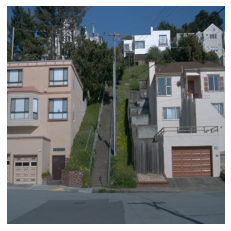

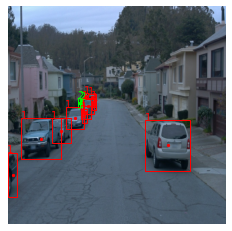

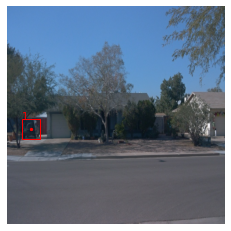

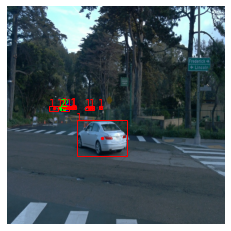

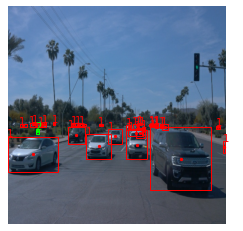

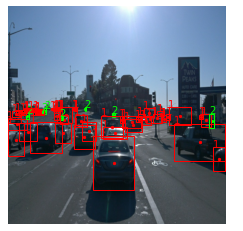

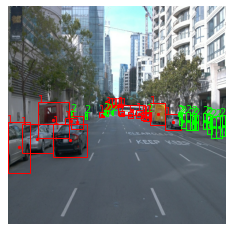

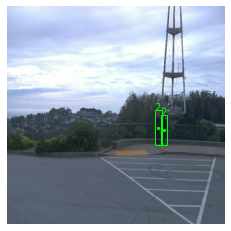

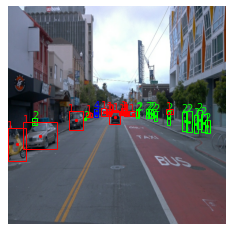

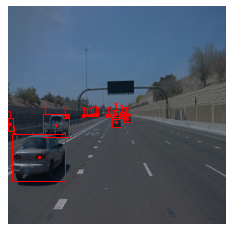

In [26]:
#args
#buffer_size: number of elements from the dataset from which the new dataset will sample 
#-take(1): we take 1 data from the shuffled buffer

buffer_size = 50
batch_size = 10
plt.figure(figsize=(15,15))
for i in range(batch_size):
    for batch in dataset.shuffle(buffer_size=buffer_size, reshuffle_each_iteration=True).take(1):
        display_instances(batch, center=True)
plt.show()



## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

#1. Classes distribution

First step of our EDA will be to visualize the classes distribution for a random batch of images, in this case, we choose 10000.
This will show us if we should apply some data augmentation for the less frequent class


In [30]:
import seaborn as sns
#if not installed please run: !pip install --target=$libs_path seaborn
#the lib will be installed in /lib, you'll need to do it just once

In [27]:
labels = {1:0, 2:0, 4:0}
labels_dict = {1:[], 2:[], 4:[]}

In [28]:
for batches in dataset.take(10000):
    try:
        obj_count = {1:0, 2:0, 4:0}
        for l in batches["groundtruth_classes"].numpy():
            labels[l]+=1
            obj_count[l]+=1
            labels_dict[l].append(obj_count[l])
    except Exception as err:
        print(err)

print(labels)


{1: 178768, 2: 50998, 4: 1439}


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Classes'),
 Text(0.5, 1.0, 'Frequency distribution - 10000 images')]

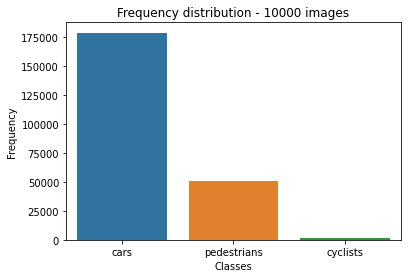

In [31]:
label_map = {'cars':labels[1], 'pedestrians':labels[2], 'cyclists':labels[4]}
keys = list(label_map.keys())
vals = [label_map[k] for k in keys]

#plot
ax = sns.barplot(x=keys, y=vals)
ax.set(xlabel = 'Classes', ylabel='Frequency', title='Frequency distribution - 10000 images')


##Cars distribution

Let's now check the cars distribution

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Cars'),
 Text(0.5, 1.0, 'Frequency distribution - Cars - 10000 images')]

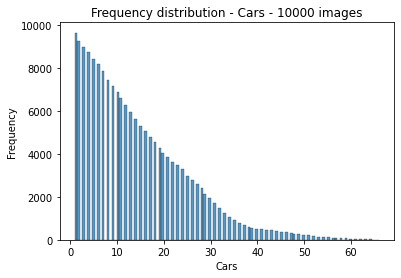

In [32]:
#histogram plot
ax_cars = sns.histplot(x=labels_dict[1])
ax_cars.set(xlabel = 'Cars', ylabel='Frequency', title='Frequency distribution - Cars - 10000 images')


## Pedestrians distribution

Let's now check the pedestrians distribution

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Pedestrians'),
 Text(0.5, 1.0, 'Frequency distribution - Pedestrians - 10000 images')]

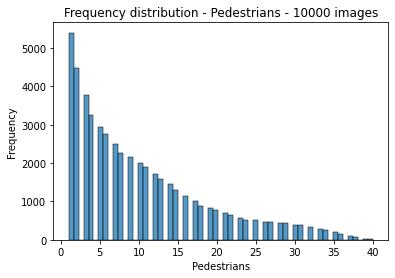

In [33]:
#histogram plot
ax_pedestrians = sns.histplot(x=labels_dict[2])
ax_pedestrians.set(xlabel = 'Pedestrians', ylabel='Frequency', title='Frequency distribution - Pedestrians - 10000 images')


## Cyclists distribution

Let's now check the cyclist distribution

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Cyclists'),
 Text(0.5, 1.0, 'Frequency distribution - Cyclists - 10000 images')]

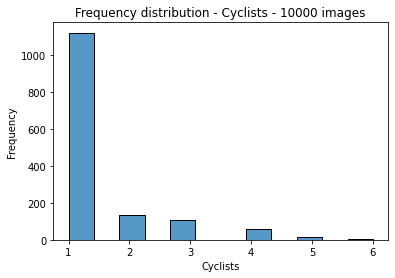

In [34]:
#histogram plot
ax_cyclists = sns.histplot(x=labels_dict[4])
ax_cyclists.set(xlabel = 'Cyclists', ylabel='Frequency', title='Frequency distribution - Cyclists - 10000 images')


## Analysis


We can easily assess that the classes are highly imbalanced.
Dealing with imbalanced classes will impact on our average precision and recall. 

- From the **cars** histplot we can understand that the cars distribution is positive-skewed, i.e. the mean, mode and median have different values for the distribution. We can see a long right skewed tail, and this can represent a lower bound in our cars-labeled dataset. 

- The **pedestrians** distribution is also right-skewed but with a shorter tail.

- We can see how the **cyclists** are so unrepresented in the dataset


There are two main strategies to deal with class imbalance: 
- augment the data from that particular class
- add weights to the loss. In the tensorflow object detection api we must use the **focal loss** to the pipeline.config file.
The focal loss technique (see: https://arxiv.org/pdf/1708.02002.pdf) aims to reshape the standard cross entropy loss such that it down-weights the loss assigned to well-classified examples. This is specially designed for two-stages object detection models like RetinaNet (ssd Resnet50)


# 2. Image-wise analysis




## Brightness

Let's have a look at the image brightness. We will plot the brightness distribution for a random batch and then visualize the most and less bright images to define our boundaries. We will use these information for augmentation

In [35]:
from PIL import Image, ImageStat
import numpy as np

def avg_brightness(numpy_img):
    img = Image.fromarray(np.uint8(numpy_img)).convert('L')
    stat = ImageStat.Stat(img)
    return stat.mean[0]
    

<Figure size 1080x1080 with 0 Axes>

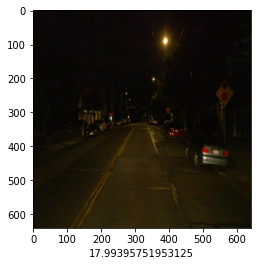

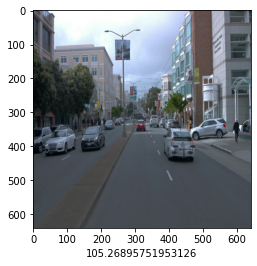

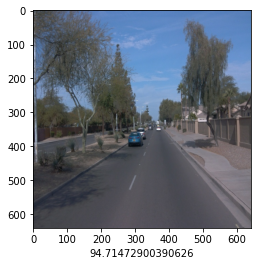

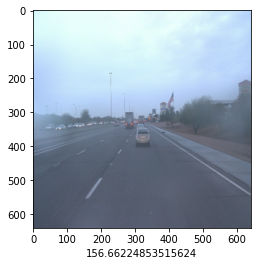

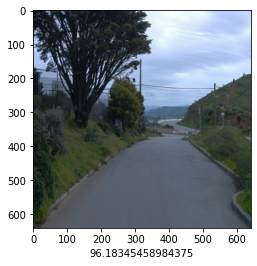

In [39]:
buffer_size = 50
batch_size = 5
plt.figure(figsize=(15,15))
for i in range(batch_size):
    for batch in dataset.shuffle(buffer_size=buffer_size, reshuffle_each_iteration=True).take(1):
        fig, ax = plt.subplots()
        img = batch['image'].numpy()
        ax.imshow(img)
        
        avg = avg_brightness(img)
        ax.set_xlabel(avg)
          
plt.show()



From the images above we can think of a threshold to discern between day and night images.
Let's plot the brightness distribution 

[Text(17.200000000000003, 0.5, 'Frequency'),
 Text(0.5, 17.200000000000003, 'brightness'),
 Text(0.5, 1.0, 'Frequency distribution - Brightness - 500 images')]

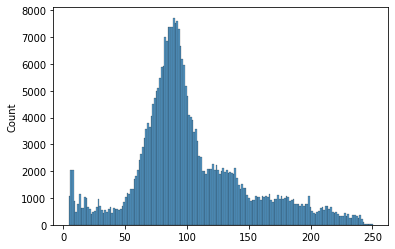

In [40]:
brightness = []
for batches in dataset.take(500):
    try:
        for img in batches["image"].numpy():
            avg = avg_brightness(img)
            brightness.append(avg)
    except Exception as err:
        print(err)

#histogram plot
ax_brightness = sns.histplot(x=brightness)
ax_pedestrians.set(xlabel = 'brightness', ylabel='Frequency', title='Frequency distribution - Brightness - 500 images')


As we can see, the brightness for most of the images falls between 80-120.
Let's visualize some images with some very low or very high brightness

Very dark images


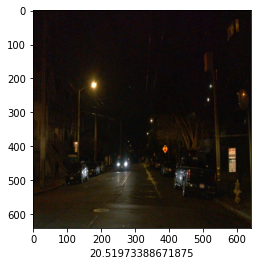

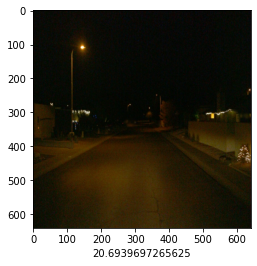

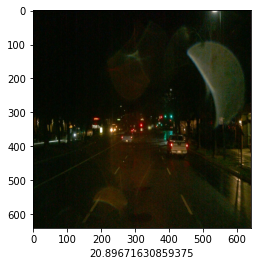

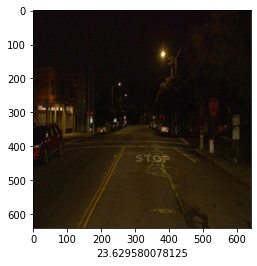

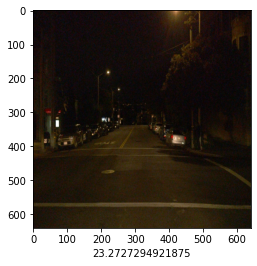

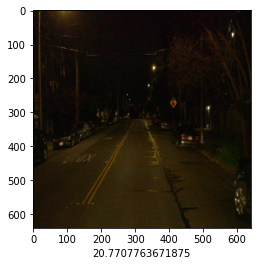

In [44]:
print("Very dark images")
count = 0
for batch in dataset.take(100):
    img = batch['image'].numpy()
    avg = avg_brightness(img)
    if (avg <25):
        if count< 10:
            fig, ax = plt.subplots()
            ax.imshow(img)
            ax.set_xlabel(avg)
            count+=1
plt.show()


Very bright images


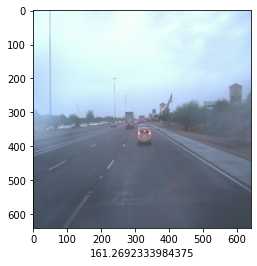

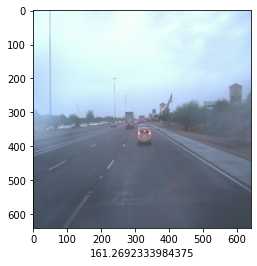

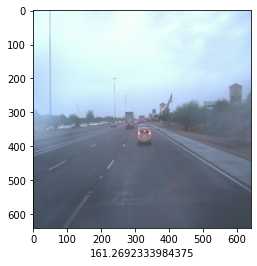

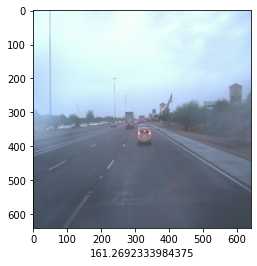

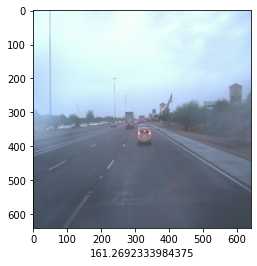

In [45]:
print("Very bright images")
count = 0
for batch in dataset.take(10000):
    img = batch['image'].numpy()
    avg = avg_brightness(img)
    if count <10:
        if avg>160:
            fig, ax = plt.subplots()
            ax.imshow(img)
            ax.set_xlabel(avg)
            count+=1
          
plt.show()

#3. BBox-wise analysis

## Class wise bounding box area distribution

Let's have a look at the distribution of bbox areas for the classes

In [46]:
labels = {1:0, 2:0, 4:0}
areas_dict = {1:[], 2:[], 4:[]}
centers_dict = {1:[], 2:[], 4:[]}

In [47]:
for batches in dataset.take(10000):
    try:
        obj_count = {1:0, 2:0, 4:0}
        for coord, l in zip(batches['groundtruth_boxes'].numpy(), batches["groundtruth_classes"].numpy()):
            x1, y1, x2, y2 = coord[1]*640, coord[0]*640, coord[3]*640, coord[2]*640
            w = x2-x1
            h = y2-y1
            area = int(w*h)
            y_c = int(y1+0.5*h)
            x_c = int(x1+0.5*w)

            labels[l]+=1
            obj_count[l]+=1
            areas_dict[l].append(area)
            centers_dict[l].append([x_c, y_c])

    except Exception as err:
        print(err)

print(labels)


{1: 178137, 2: 50467, 4: 1441}


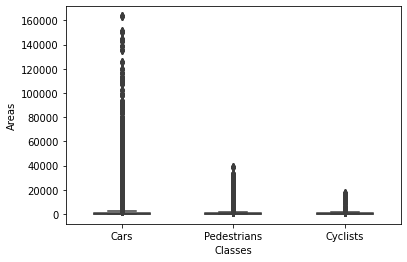

In [48]:
import operator as op
out_dict = {'Cars': areas_dict[1], 'Pedestrians': areas_dict[2], 'Cyclists':areas_dict[4]}

# sort keys and values together
sorted_keys, sorted_vals = zip(*sorted(out_dict.items(), key=op.itemgetter(1)))

# almost verbatim from question
ax = sns.boxplot(data=sorted_vals, width=0.5)
ax.set(xlabel="Classes", ylabel="Areas")

# category labels
plt.xticks(plt.xticks()[0], sorted_keys)

plt.show()


## BBoxes center points + standardized areas distributions for classes

I was curious to know the areas in which the bboxes for each class would be present and to visualize the relatives areas of them
Below the proposed code
The areas are standardized by subtracting the mean and dividing by the standard deviation

In [183]:
#get an image from the inference_images folder
#these images were took from the waymo dataset webpage
img_path = workspace_path + '/experiments/inference_images/1.jpeg'

In [184]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import random

def show_bubbleplot(index, label, colorout):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (640, 640), interpolation=cv2.INTER_AREA)
    text = 'Distribution of standardized ' + label.upper() + ' bboxes areas'
    font = cv2.FONT_HERSHEY_SIMPLEX
    mean = np.mean(areas_dict[index])
    std = np.std(areas_dict[index])
    cv2.rectangle(img, (90, 20), (600, 70), (255,255,255), -1)
    cv2.putText(img, text,(100,50), fontFace = font, fontScale=0.5, 
                color = (255,0,0), thickness=1)
    for a, p in zip(areas_dict[index], centers_dict[index]):
       img = cv2.circle(img, (int(p[0]),int(p[1])), radius=int((a-mean)/std)*4, color=(255, 255, colorout), thickness=1)
    cv2_imshow(img)




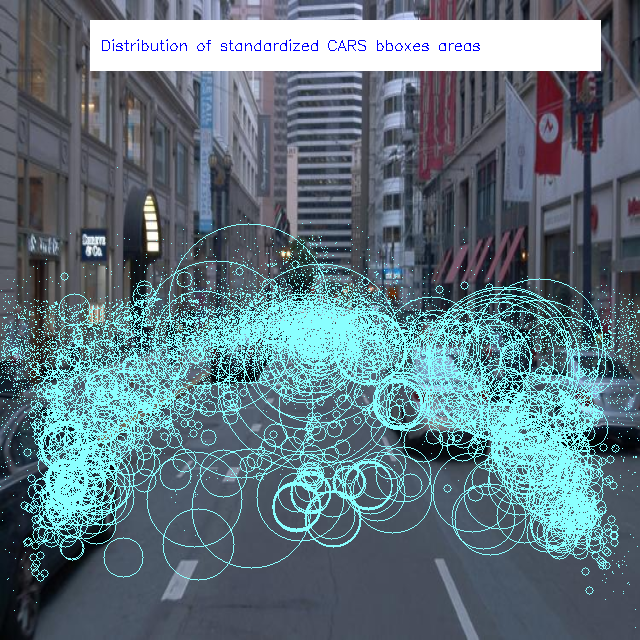

In [185]:
color = random.randint(0, 255)
show_bubbleplot(1, 'Cars', color)


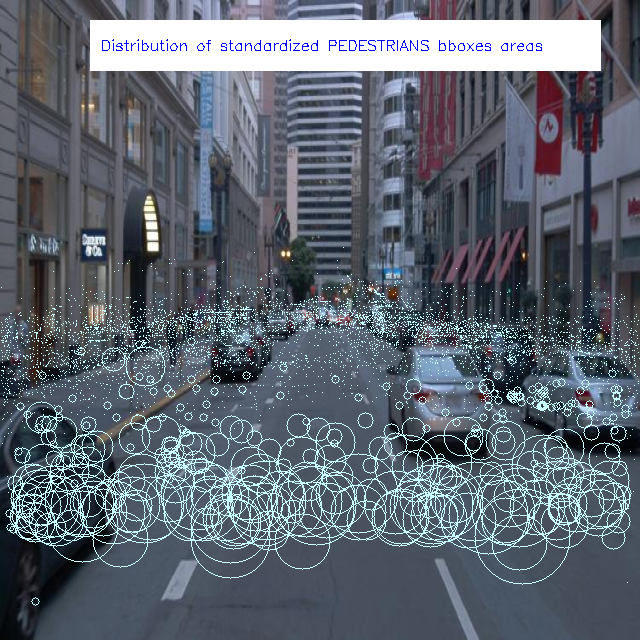

In [186]:
color = random.randint(0, 255)
show_bubbleplot(2, 'Pedestrians', color)

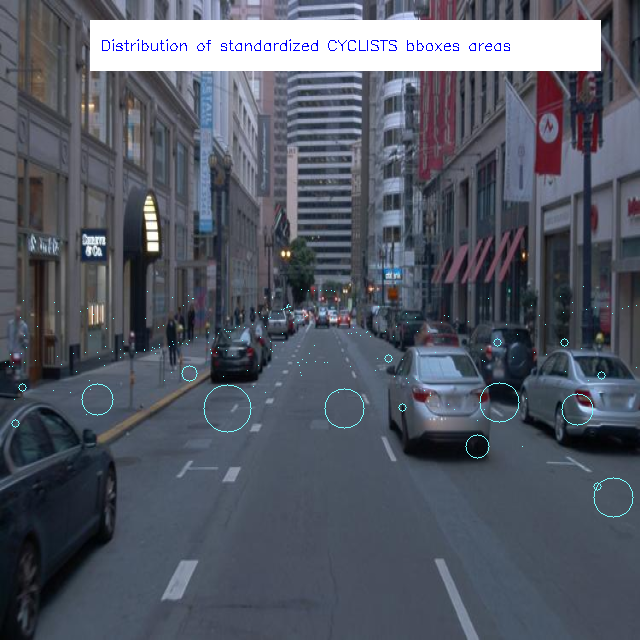

In [187]:
color = random.randint(0, 255)
show_bubbleplot(4, 'Cyclists', color)

#4. Split criterion


Usually, splitting the dataset into 80% train 10% validation 10% test is a good starting point.
A more tuned split will depend on the dataset size and the specifics of the model

At this stage, having 100 tfrecords and more than 50k images, we don't have any restriction based on the data quantity. 
Being the test set already selected (3 tfrecords), we will split the train and val sets to 97x0.85 and 97x0.15 respectively